# Used Cars in the US

### Data cleaning and preparetaion 

In [1]:
### Download the Data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('C:/Andre files/Used_Cars/archive/UserCarData.csv')
data

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Yes
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Yes
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Yes
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Yes
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,No
7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,No
7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,No
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,No


In [2]:
data.info() #Getting more info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

In [3]:
# getting stats from the variables
data.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [4]:
# finding the numerical columns 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_data = data.select_dtypes(include=numerics)
len(num_data.columns)

8

In [5]:
# Is there any missing values

data.isna().sum().sort_values(ascending=False)

#There are no missing values

Sales_ID             0
name                 0
seats                0
torque               0
max_power            0
engine               0
mileage              0
owner                0
transmission         0
seller_type          0
fuel                 0
City                 0
State or Province    0
Region               0
km_driven            0
selling_price        0
year                 0
sold                 0
dtype: int64

In [6]:
data.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

In [7]:
# Transform my y variable to int
data['sold']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7901     No
7902     No
7903     No
7904     No
7905     No
Name: sold, Length: 7906, dtype: object

In [8]:
data.dtypes

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
torque                object
seats                  int64
sold                  object
dtype: object

In [9]:
#Let's create a new column called car_sold

In [10]:
data.sold = data['sold'].map({'No':0, 'Yes':1})

In [11]:
data.sold

0       1
1       1
2       1
3       1
4       1
       ..
7901    0
7902    0
7903    0
7904    0
7905    0
Name: sold, Length: 7906, dtype: int64

## Data Analysis and Visualisation
### Cars available or sold

In [12]:
data.name

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
7901    Hyundai
7902    Hyundai
7903     Maruti
7904       Tata
7905       Tata
Name: name, Length: 7906, dtype: object

In [13]:
# Let's get the car types
car_type = data.name.unique()
len(car_type)

31

In [14]:
# Cars available / sold per brand

cars_brand = data.name.value_counts()
cars_brand

Maruti        2367
Hyundai       1360
Mahindra       758
Tata           719
Honda          466
Toyota         452
Ford           388
Chevrolet      230
Renault        228
Volkswagen     185
BMW            118
Skoda          104
Nissan          81
Jaguar          71
Volvo           67
Datsun          65
Mercedes        54
Fiat            41
Audi            40
Lexus           34
Jeep            31
Mitsubishi      14
Force            6
Land             6
Isuzu            5
Kia              4
Ambassador       4
Daewoo           3
MG               3
Ashok            1
Opel             1
Name: name, dtype: int64

<AxesSubplot:>

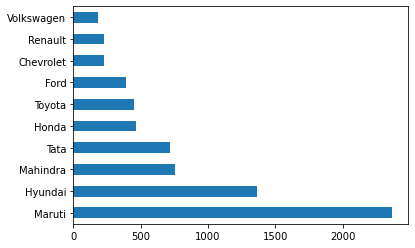

In [15]:
# let's plot this result for a better picture
cars_brand[:10].plot(kind='barh')

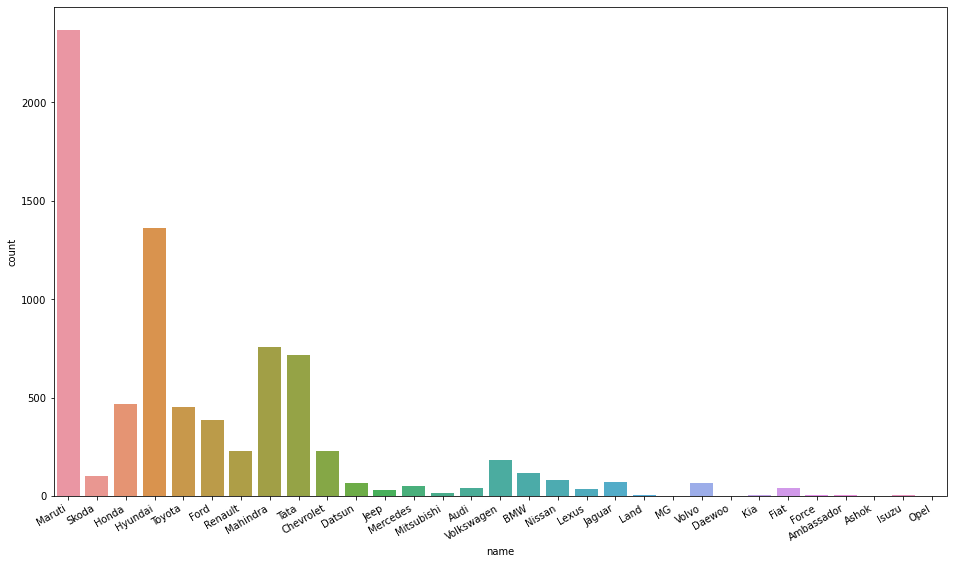

In [16]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(x = 'name', data = data)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [17]:
data.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

In [18]:
data.reset_index(inplace=True)

In [19]:
data = data.rename(columns = {'index':'Index_ID'})

In [20]:
data_groupby = data.groupby(['sold','name'])['Index_ID'].count()
print(data_groupby)

sold  name      
0     Ambassador       4
      Ashok            1
      Audi            31
      BMW             89
      Chevrolet      174
      Daewoo           2
      Datsun          49
      Fiat            35
      Force            5
      Ford           296
      Honda          342
      Hyundai       1028
      Isuzu            5
      Jaguar          50
      Jeep            22
      Kia              2
      Land             5
      Lexus           23
      MG               1
      Mahindra       557
      Maruti        1770
      Mercedes        38
      Mitsubishi      11
      Nissan          48
      Opel             1
      Renault        172
      Skoda           84
      Tata           541
      Toyota         326
      Volkswagen     146
      Volvo           48
1     Audi             9
      BMW             29
      Chevrolet       56
      Daewoo           1
      Datsun          16
      Fiat             6
      Force            1
      Ford            92
      Ho

In [21]:
Maruti = 597
Hyundai = 332
Mahindra = 201
Tata = 178
Toyota = 126
Honda = 124
Ford = 92
Chevrolet = 56
Renault = 56
Volkswagen = 39
Total_sold = 2000
Total = 7906

In [22]:
data.sold.value_counts()

0    5906
1    2000
Name: sold, dtype: int64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as pd

In [24]:
Cars_Sold = Maruti, Hyundai, Mahindra, Tata, Toyota, Honda, Ford, Chevrolet, Renault, Volkswagen
print(Cars_Sold)

(597, 332, 201, 178, 126, 124, 92, 56, 56, 39)


In [25]:
Maruti = Maruti / Total_sold *100
Hyundai = Hyundai / Total_sold *100
Mahindra = Mahindra / Total_sold *100
Tata = Tata / Total_sold *100
Toyota = Toyota / Total_sold *100
print(Maruti, Hyundai, Mahindra, Tata, Toyota)

29.849999999999998 16.6 10.05 8.9 6.3


In [26]:
# Maruti represents circa 30% of total cars sold 
# Hyundai 17%
# Mahindra 10%
# Tata 9%
# Toyota 6

### Maruti and Hyundai also make the majority of cars in the dataset 

### Year

In [27]:
data.year

0       2014
1       2014
2       2006
3       2010
4       2007
        ... 
7901    2013
7902    2007
7903    2009
7904    2013
7905    2013
Name: year, Length: 7906, dtype: int64

In [28]:
data.year.describe()

count    7906.000000
mean     2013.983936
std         3.863695
min      1994.000000
25%      2012.000000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [29]:
from scipy import stats
import scipy as scipy 

<Figure size 432x288 with 0 Axes>

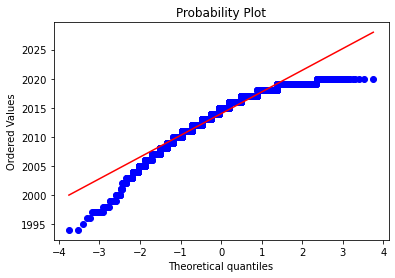

<Figure size 432x288 with 0 Axes>

In [30]:
#Check if the variable is normally distributed with a graph 
stats.probplot(data.year, plot=plt)
plt.figure()

In [31]:
# Shapiro Wilk Test
stats.shapiro(data.year)

# Running this command we can observe 2 values (test statistics and p-value)

# H0 is that the data is normal
# HI data is not normal 

C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9312893748283386, pvalue=0.0)

In [32]:
# based on the p-value of 0.0 (<= 0.05) we reject H0 and assume that our data is not normally distributed. 

In [33]:
# let's filter the data by cars sold only

In [34]:
df2 = data[data.Index_ID <= 2001]
print(df2)

      Index_ID  Sales_ID        name  year  selling_price  km_driven   Region  \
0            0         1      Maruti  2014         450000     145500     East   
1            1         2       Skoda  2014         370000     120000     East   
2            2         3       Honda  2006         158000     140000  Central   
3            3         4     Hyundai  2010         225000     127000  Central   
4            4         5      Maruti  2007         130000     120000     East   
...        ...       ...         ...   ...            ...        ...      ...   
1997      1997      2059      Maruti  2016         245000      50000     West   
1998      1998      2060        Tata  2013         260000     189000     West   
1999      1999      2061  Volkswagen  2014         411000      90000     West   
2000      2000      2062     Hyundai  2014         450000      56000     West   
2001      2001      2063         BMW  2012        1300000     140000     West   

         State or Province 

In [35]:
df2.head()

,Index_ID,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,1
1,1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,1
2,2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,1
3,3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,1
4,4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,1


<Figure size 432x288 with 0 Axes>

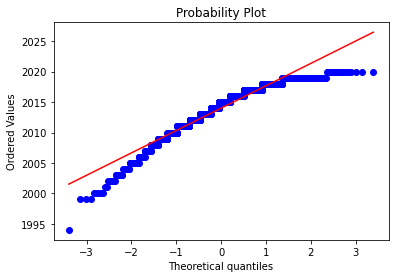

<Figure size 432x288 with 0 Axes>

In [36]:
#let's re-run the dist test
stats.probplot(df2.year, plot=plt)
plt.figure()

In [37]:
# shapiro wilk test
stats.shapiro(df2.year)

ShapiroResult(statistic=0.9375806450843811, pvalue=3.2408793176645233e-28)

In [38]:
# even with only cars sold we still have our variable year not normally distributed 

<AxesSubplot:xlabel='year', ylabel='selling_price'>

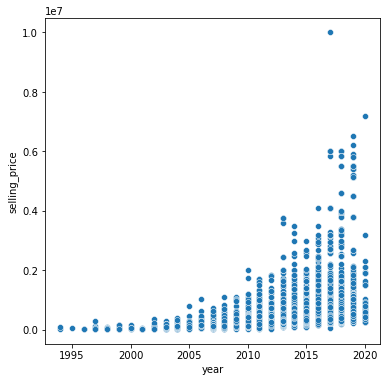

In [39]:
#Let's see if there is a correlation between car sold and year
plt.figure(figsize=(6,6))
#sns.boxplot(x='year', data=data)
sns.scatterplot(x='year',y='selling_price', data=data)
# 

In [40]:
#plt.figure(figsize=(6,6))
#sns.boxplot(x='Store_Area', data=data)
#sns.scatterplot(x='Items_Available',y='Store_Area', data=data)

In [41]:
# Group by year and car solve 
data_groupby = data.groupby(['sold','year'])['Index_ID'].count()
print(data_groupby)

sold  year
0     1994      1
      1995      1
      1996      2
      1997      9
      1998      9
      1999     11
      2000     10
      2001      4
      2002     12
      2003     27
      2004     38
      2005     51
      2006     79
      2007    145
      2008    158
      2009    160
      2010    279
      2011    415
      2012    462
      2013    494
      2014    476
      2015    575
      2016    631
      2017    754
      2018    619
      2019    429
      2020     55
1     1994      1
      1999      3
      2000      5
      2001      2
      2002      7
      2003     10
      2004     13
      2005     25
      2006     23
      2007     28
      2008     43
      2009     71
      2010     96
      2011    155
      2012    159
      2013    174
      2014    144
      2015    200
      2016    225
      2017    256
      2018    187
      2019    154
      2020     19
Name: Index_ID, dtype: int64


In [42]:
# The cars most sold are from 2019 to 2011

In [43]:
data_groupby = data.groupby(['year','name'])['Index_ID'].count()
print(data_groupby)

year  name      
1994  Ambassador     1
      Maruti         1
1995  Maruti         1
1996  Maruti         2
1997  Maruti         9
                    ..
2020  Mahindra       5
      Maruti        33
      Tata           9
      Toyota         5
      Volkswagen     3
Name: Index_ID, Length: 290, dtype: int64


In [44]:
data_groupby = df2[["State or Province", "sold"]].groupby(['State or Province'], as_index=False).count().sort_values(by='sold', ascending=False)
print(data_groupby)

       State or Province  sold
26              New York   293
3             California   274
10              Illinois   148
34                 Texas   138
38            Washington   120
7                Florida   118
31          Pennsylvania    80
17         Massachusetts    76
27        North Carolina    75
18              Michigan    71
6   District of Columbia    68
8                Georgia    62
11               Indiana    45
28                  Ohio    40
30                Oregon    30
12                  Iowa    30
33             Tennessee    29
16              Maryland    28
29              Oklahoma    27
2               Arkansas    27
13                Kansas    26
40             Wisconsin    25
19             Minnesota    25
35                  Utah    22
24            New Jersey    15
9                  Idaho    15
15                 Maine    14
1                Arizona    12
14              Kentucky    12
0                Alabama    11
4               Colorado     8
21      

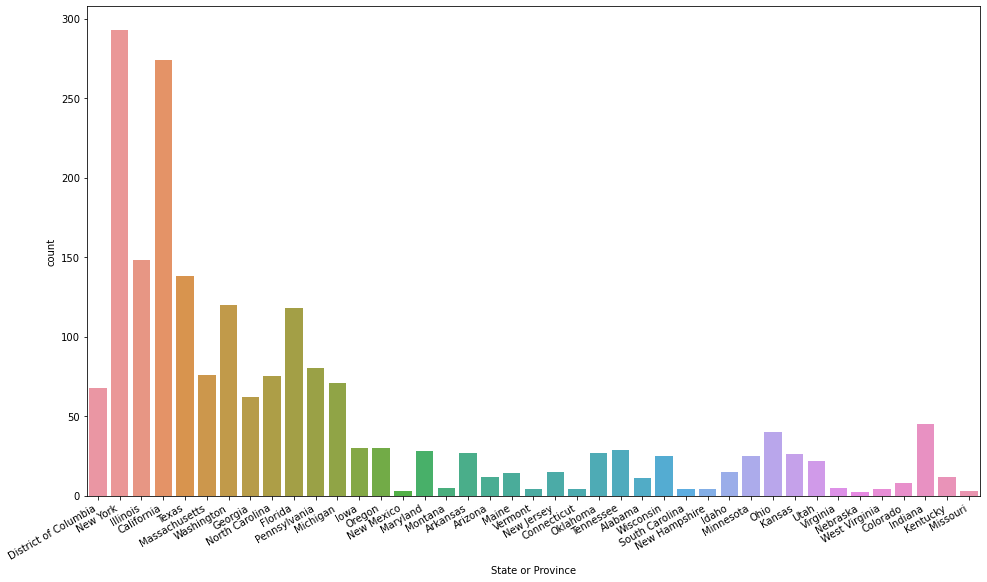

In [45]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(x = 'State or Province', data = df2)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [46]:
# The States that sell most cars are New York and California. 

### Selling Price

In [47]:
data

,Index_ID,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,1
1,1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,1
2,2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,1
3,3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,1
4,4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,0
7902,7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,0
7903,7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,0
7904,7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,0


In [48]:
data.selling_price.describe()

count    7.906000e+03
mean     6.498137e+05
std      8.135827e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.900000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [49]:
data_groupby = df2[["selling_price","State or Province"]].groupby(['selling_price'], as_index=False).max().sort_values(by='selling_price', ascending=False)
print(data_groupby)

     selling_price     State or Province
367       10000000              New York
366        6000000                  Iowa
365        5850000            California
364        5800000              New York
363        5500000                  Ohio
..             ...                   ...
4            50000              Illinois
3            45000          Pennsylvania
2            40000  District of Columbia
1            35000                Oregon
0            31504               Florida

[368 rows x 2 columns]


In [50]:
# Most expensive car was sold in New York, Iowe, and California

In [51]:
df2.selling_price.describe()

count    2.002000e+03
mean     6.765700e+05
std      8.853700e+05
min      3.150400e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.800000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [52]:
df2.describe()

,Index_ID,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats,sold
count,2002.000000,2002.000000,2002.000000,2.002000e+03,2.002000e+03,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,1000.500000,1032.436563,2014.001998,6.765700e+05,6.873670e+04,19.220470,1470.414585,92.266494,5.432567,0.999001
std,578.071939,595.190326,3.792335,8.853700e+05,5.613905e+04,4.017491,520.467006,37.060952,0.966556,0.031599
min,0.000000,1.000000,1994.000000,3.150400e+04,1.000000e+03,0.000000,624.000000,34.200000,4.000000,0.000000
25%,500.250000,515.250000,2012.000000,2.700000e+05,3.394600e+04,16.780000,1197.000000,68.000000,5.000000,1.000000
50%,1000.500000,1031.500000,2015.000000,4.500000e+05,6.000000e+04,19.090000,1248.000000,82.625000,5.000000,1.000000
75%,1500.750000,1549.750000,2017.000000,6.800000e+05,9.400000e+04,22.000000,1585.000000,103.200000,5.000000,1.000000
max,2001.000000,2063.000000,2020.000000,1.000000e+07,1.500000e+06,42.000000,3604.000000,400.000000,10.000000,1.000000


In [53]:
value_of_cars_sold = df2.selling_price.value_counts()
value_of_cars_sold

300000    60
450000    56
600000    52
550000    50
350000    49
          ..
441000     1
67500      1
298000     1
681000     1
411000     1
Name: selling_price, Length: 368, dtype: int64

<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

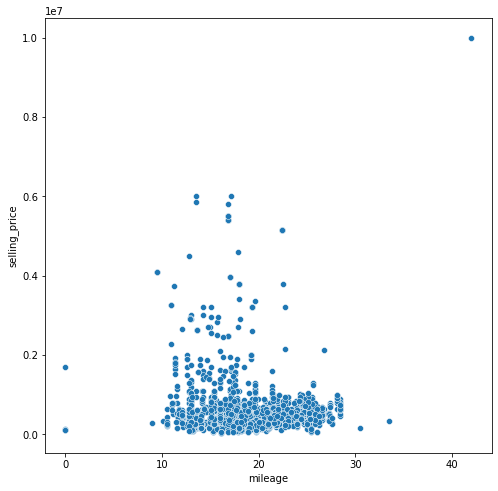

In [54]:
# Let's understand the correlation between selling price and the other variables
plt.figure(figsize=(8,8))
sns.scatterplot(x='mileage',y='selling_price', data=df2)
# The expected correlation between selling price and current mileage of the car does not seem to exist. 

In [55]:
df2['selling_price'].corr(df2['mileage']) 

-0.10086147273676355

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

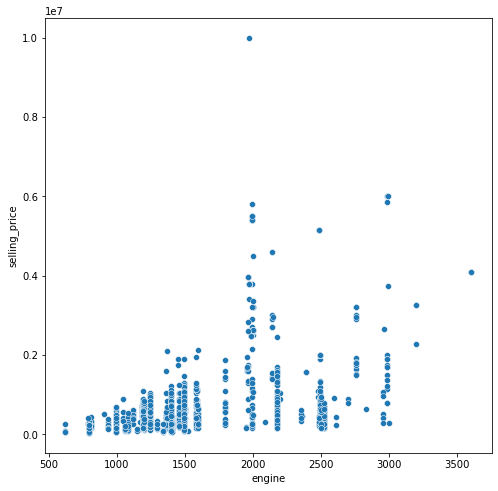

In [56]:
# Testing the correlation between selling price and engine power
plt.figure(figsize=(8,8))
sns.scatterplot(x='engine', y='selling_price', data=df2)

In [57]:
df2['selling_price'].corr(df2['engine'])
# There is a weak to moderate correlation between car selling price and engine size. 

0.45645450235976

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

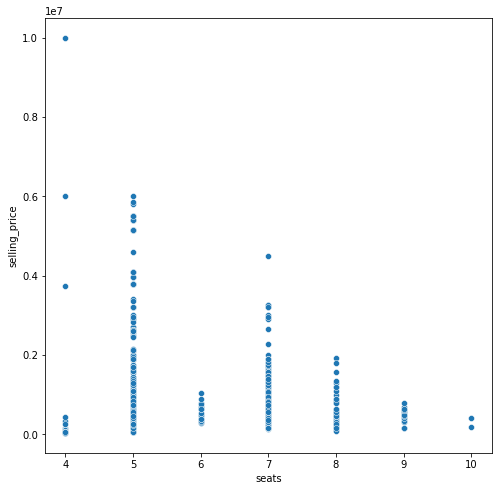

In [58]:
# We can also test the correlation between selling price and number of seats
plt.figure(figsize=(8,8))
sns.scatterplot(x='seats', y='selling_price', data=df2)

In [59]:
df2['selling_price'].corr(df2['seats'])

0.009262490994833178

In [60]:
data_groupby = df2.groupby(['selling_price','seats'])['Index_ID'].count()
print(data_groupby)

selling_price  seats
31504          4        1
35000          4        1
40000          4        2
45000          4        6
50000          5        1
                       ..
5800000        5        1
5850000        5        1
6000000        4        1
               5        1
10000000       4        1
Name: Index_ID, Length: 538, dtype: int64


### Fuel type

In [61]:
data.info

<bound method DataFrame.info of       Index_ID  Sales_ID     name  year  selling_price  km_driven   Region  \
0            0         1   Maruti  2014         450000     145500     East   
1            1         2    Skoda  2014         370000     120000     East   
2            2         3    Honda  2006         158000     140000  Central   
3            3         4  Hyundai  2010         225000     127000  Central   
4            4         5   Maruti  2007         130000     120000     East   
...        ...       ...      ...   ...            ...        ...      ...   
7901      7901      8124  Hyundai  2013         320000     110000  Central   
7902      7902      8125  Hyundai  2007         135000     119000  Central   
7903      7903      8126   Maruti  2009         382000     120000  Central   
7904      7904      8127     Tata  2013         290000      25000     East   
7905      7905      8128     Tata  2013         290000      25000     East   

         State or Province     

In [62]:
data.fuel.describe()

count       7906
unique         4
top       Diesel
freq        4299
Name: fuel, dtype: object

In [63]:
data.fuel = data.fuel.astype(str)

In [64]:
data.fuel

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
7901    Petrol
7902    Diesel
7903    Diesel
7904    Diesel
7905    Diesel
Name: fuel, Length: 7906, dtype: object

In [65]:
print(data.fuel.dtypes)

object


In [66]:
# Convert fuel type from str to int
data_1 = data.replace({'fuel' : { 'Diesel' : 1, 'Petrol' : 2, 'LPG' : 3, 'CNG': 4}}, regex=True)
# Diesel = 1 and Petrol = 2

In [67]:
data_1.fuel

0       1
1       1
2       2
3       1
4       2
       ..
7901    2
7902    1
7903    1
7904    1
7905    1
Name: fuel, Length: 7906, dtype: int64

<AxesSubplot:xlabel='fuel', ylabel='count'>

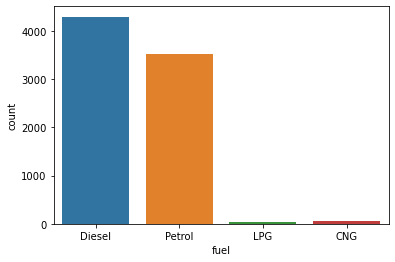

In [68]:
#Plot fuel types
sns.countplot(x = 'fuel', data = data)


In [69]:
fuel_type = data.fuel.value_counts()
fuel_type

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

<AxesSubplot:xlabel='fuel', ylabel='count'>

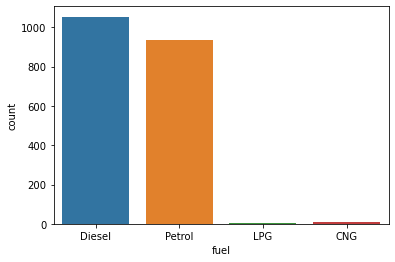

In [70]:
#Plot fuel types among cars sold
sns.countplot(x = 'fuel', data = df2)

In [71]:
# Among cars sold
fuel_type_df2 = df2.fuel.value_counts()
fuel_type_df2

Diesel    1054
Petrol     935
CNG          7
LPG          6
Name: fuel, dtype: int64

In [72]:
Diesel = 1054
Petrol = 935
CNG = 7
LPG = 6
Total = 2000

In [73]:
Diesel / Total * 100

52.7

In [74]:
Petrol / Total * 100

46.75

In [75]:
CNG / Total * 100

0.35000000000000003

In [76]:
LPG / Total * 100

0.3

In [77]:
# The cars sold are well divided between Diesel and Petrol 

In [78]:
data_groupby = df2[["State or Province", "fuel","Index_ID"]].groupby(['State or Province','fuel'], as_index=False).count().sort_values(by='Index_ID', ascending=False)
print(data_groupby)

   State or Province    fuel  Index_ID
59          New York  Petrol       153
7         California  Diesel       146
58          New York  Diesel       139
9         California  Petrol       125
24          Illinois  Diesel        86
..               ...     ...       ...
48           Montana  Diesel         1
50          Nebraska  Diesel         1
51          Nebraska  Petrol         1
57          New York     CNG         1
46          Missouri  Diesel         1

[92 rows x 3 columns]


### Seller Type

In [79]:
data

,Index_ID,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,1
1,1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,1
2,2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,1
3,3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,1
4,4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,0
7902,7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,0
7903,7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,0
7904,7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,0


In [80]:
data.seller_type.describe()

count           7906
unique             3
top       Individual
freq            6563
Name: seller_type, dtype: object

In [81]:
data.seller_type.info

<bound method Series.info of 0       Individual
1       Individual
2       Individual
3       Individual
4       Individual
           ...    
7901    Individual
7902    Individual
7903    Individual
7904    Individual
7905    Individual
Name: seller_type, Length: 7906, dtype: object>

In [82]:
# Let's get the seller types
seller_tp = data.seller_type.unique()
len(seller_tp)

3

In [83]:
# cars per seller type
Sell_TP = data.seller_type.value_counts()
Sell_TP

Individual          6563
Dealer              1107
Trustmark_Dealer     236
Name: seller_type, dtype: int64

<AxesSubplot:>

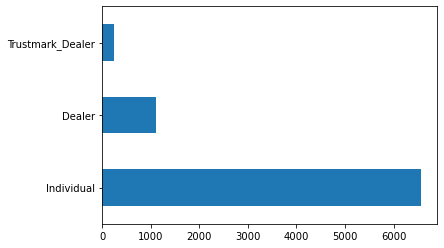

In [84]:
# Let's plot this
Sell_TP.plot(kind='barh')

In [85]:
# Among the cars sold
Sel_type = df2.seller_type.value_counts()
Sel_type

Individual          1631
Dealer               291
Trustmark_Dealer      80
Name: seller_type, dtype: int64

<AxesSubplot:>

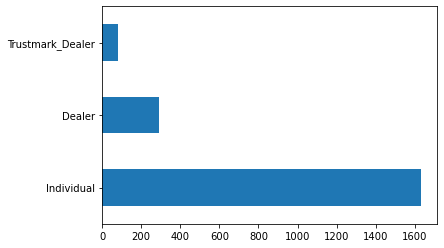

In [86]:
# Let's plot this
Sel_type.plot(kind='barh')

In [87]:
# % of car sold 
# cars per seller type
c_sold = df2.sold.value_counts()
c_sold

1    2000
0       2
Name: sold, dtype: int64

In [88]:
Individual = 1631
Dealer = 291
Trustmaker = 80
Total = 2000

In [89]:
Ind = Individual / Total * 100
Dea = Dealer / Total * 100
TruMaker = Trustmaker / Total * 100

print(Ind, Dea, TruMaker)

81.55 14.549999999999999 4.0


In [90]:
# Indivual sellers make approx. 81.5% of the car sold dataset. 14.5% are dealers and 4 are turstmakers 

In [91]:
data_groupby = df2[["State or Province", "seller_type","Index_ID"]].groupby(['State or Province','seller_type'], as_index=False).count().sort_values(by='Index_ID', ascending=False)
print(data_groupby)

   State or Province       seller_type  Index_ID
8         California        Individual       239
55          New York        Individual       232
24          Illinois        Individual       139
71             Texas        Individual       121
78        Washington        Individual       102
..               ...               ...       ...
45          Missouri        Individual         1
62              Ohio  Trustmark_Dealer         1
31          Kentucky            Dealer         1
44          Missouri            Dealer         1
46          Missouri  Trustmark_Dealer         1

[82 rows x 3 columns]


### Transmission

In [92]:
data.transmission

0       Manual
1       Manual
2       Manual
3       Manual
4       Manual
         ...  
7901    Manual
7902    Manual
7903    Manual
7904    Manual
7905    Manual
Name: transmission, Length: 7906, dtype: object

In [93]:
# Let's get the transmission types
transmission_type = data.transmission.unique()
len(transmission_type)

2

In [94]:
# Trnasmission
trans_type = data.transmission.value_counts()
trans_type

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [95]:
total = 7906
manual = 6865
auto = 1041

Man = manual / total *100
Aut = auto / total *100

print(Man, Aut)

86.83278522641032 13.167214773589677


In [96]:
# 87% of the dataset is composed of manual cars and 13% of automatic 

In [97]:
# Trnasmission
trans_type = df2.transmission.value_counts()
trans_type

Manual       1715
Automatic     287
Name: transmission, dtype: int64

In [98]:
total = 2000
manual = 1715
auto = 287

Man = manual / total *100
Aut = auto / total *100

print(Man, Aut)

85.75 14.35


In [99]:
# among the cars sold 85% are manual and 15% are automatic 

### Maximum Power

In [100]:
data.max_power

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
7901     82.85
7902    110.00
7903     73.90
7904     70.00
7905     70.00
Name: max_power, Length: 7906, dtype: float64

In [101]:
data.max_power.describe()

count    7906.000000
mean       91.587374
std        35.747216
min        32.800000
25%        68.050000
50%        82.000000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

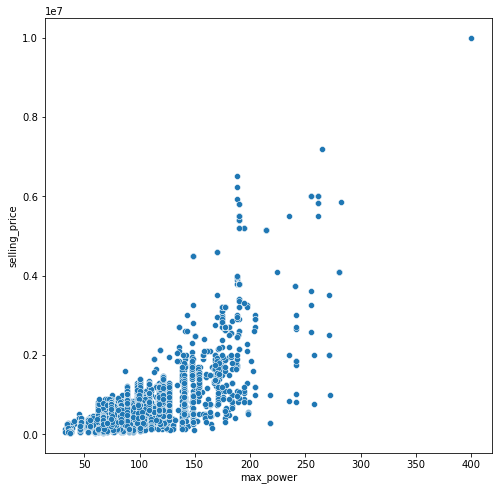

In [102]:
# We can also test the correlation between selling price and maximum power
plt.figure(figsize=(8,8))
sns.scatterplot(x='max_power', y='selling_price', data=data)

In [103]:
data['selling_price'].corr(data['max_power'])

0.7496737800444901

In [104]:
# There is a positive and strong correlation between maximum power and seeling price 

In [105]:
df2['selling_price'].corr(df2['max_power'])

0.7779502506669159

In [109]:
# The correlation increases among the cars already sold

<Figure size 432x288 with 0 Axes>

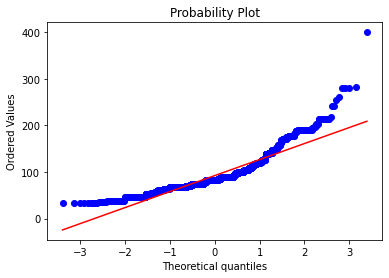

<Figure size 432x288 with 0 Axes>

In [106]:
#let's re-run the dist test
stats.probplot(df2.max_power, plot=plt)
plt.figure()

In [107]:
# shapiro wilk test
stats.shapiro(df2.max_power)

ShapiroResult(statistic=0.8593643307685852, pvalue=4.7943787437670356e-39)

In [108]:
# Running this command we can observe 2 values (test statistics and p-value)

# H0 is that the data is normal
# HI data is not normal


# based on the p-value of 0.0 (<= 0.05) we reject H0 and assume that our data is not normally distributed. 

### Owners

In [109]:
data.columns

Index(['Index_ID', 'Sales_ID', 'name', 'year', 'selling_price', 'km_driven',
       'Region', 'State or Province', 'City', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'sold'],
      dtype='object')

In [110]:
data.owner

0              First_Owner
1             Second_Owner
2              Third_Owner
3              First_Owner
4              First_Owner
               ...        
7901           First_Owner
7902    Fourth_Above_Owner
7903           First_Owner
7904           First_Owner
7905           First_Owner
Name: owner, Length: 7906, dtype: object

In [111]:
# Let's get the number of owners
owners = data.owner.unique()
len(owners)

5

In [112]:
# owner type
owner_TP = data.owner.value_counts()
owner_TP

First_Owner           5215
Second_Owner          2016
Third_Owner            510
Fourth_Above_Owner     160
Test_Drive_Car           5
Name: owner, dtype: int64

<AxesSubplot:>

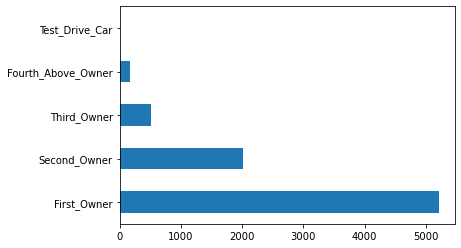

In [116]:
#Plot 
owner_TP.plot(kind='barh')

In [117]:
print(data.owner.dtypes)

object


In [120]:
# Convert fuel type from str to int
df_reg = data_1.replace({'owner' : { 'First_Owner' : 1, 'Second_Owner' : 2, 'Third_Owner' : 3, 'Fourth_Above_Owner': 4, 'Test_Drive_Car': 5}}, regex=True)

In [121]:
df_reg.owner

0       1
1       2
2       3
3       1
4       1
       ..
7901    1
7902    4
7903    1
7904    1
7905    1
Name: owner, Length: 7906, dtype: int64

## Logistic Regression 

#### The idea is to find the probability of selling a car based on brand, year, selling price, mileage, fuel, engine, max power, and seats



In [133]:
DF = df_reg.replace({
    'fuel' : {'Diesel' : 1, 'Petrol' : 2, 'LPG' : 3, 'CNG': 4},
    'owner' : {'First_Owner' : 1, 'Second_Owner' : 2, 'Third_Owner' : 3, 'Fourth_Above_Owner': 4, 'Test_Drive_Car': 5}}, regex=True)

In [135]:
DF.fuel

0       1
1       1
2       2
3       1
4       2
       ..
7901    2
7902    1
7903    1
7904    1
7905    1
Name: fuel, Length: 7906, dtype: int64